# Exploratory Notebook

Use this notebook to explore the project data using `pandas`, SQL, and Matplotlib!

You will not be submitting this notebook so feel free to try out different "experiments" to figure out what works best.

When you're happy with your code and want to turn it in, copy it into the `final.ipynb` notebook and download that notebook for the PDF submission.

## CSV and TSV Data

Here is some starter code that opens up some of the CSV and TSV data and loads it into DataFrames:

Import all necessary libraries

In [1]:
#plt.savefig(r'yourpath\fig1.pdf', bbox_inches='tight', dpi=300)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


check for missing values in the dataframe

In [4]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom_movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

check for the percentage percentage of missing values in the columns with 'NaN'

In [6]:
print('Percentage of rows with missing values in foreign_gross:', 
      len(bom_movie_gross[bom_movie_gross.foreign_gross.isna()])/ 
      len(bom_movie_gross) * 100,'%')
print('Number of unique values in foreign_gross:', len(bom_movie_gross.
                                               foreign_gross.unique()))

print('Percentage of rows with missing values in domestic_gross:', 
      len(bom_movie_gross[bom_movie_gross.domestic_gross.isna()])/ 
      len(bom_movie_gross) * 100,'%')
print('Number of unique values in domestic_gross:', len(bom_movie_gross.
                                               domestic_gross.unique()))

print('Percentage of rows with missing values in studio:', 
      len(bom_movie_gross[bom_movie_gross.studio.isna()])/ 
      len(bom_movie_gross) * 100,'%')
print('Number of unique values in studio:', len(bom_movie_gross.
                                               studio.unique()))

Percentage of rows with missing values in foreign_gross: 39.85828166519043 %
Number of unique values in foreign_gross: 1205
Percentage of rows with missing values in domestic_gross: 0.8266902863891349 %
Number of unique values in domestic_gross: 1798
Percentage of rows with missing values in studio: 0.14762326542663123 %
Number of unique values in studio: 258


Since the Foreign_gross column has so many missing values(40%), delete the entire column

In [7]:
bom_movie_gross = bom_movie_gross.drop('foreign_gross', axis = 1)
bom_movie_gross.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


Both domestic_gross and studio columns have less than 1% missing values, hence delete the rows with missing values

In [8]:
bom_movie_gross = bom_movie_gross.dropna()

Check for missing values

In [9]:
bom_movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [10]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 131.1+ KB


In [11]:
bom_movie_gross

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [12]:
test = bom_movie_gross.groupby('studio').mean()
test

,domestic_gross,year
studio,,
3D,6.100000e+06,2010.000000
A23,8.210000e+04,2012.000000
A24,6.616208e+06,2015.387755
ADC,1.241000e+05,2016.000000
AF,3.571500e+05,2013.333333
...,...,...
XL,2.290000e+05,2013.500000
YFG,1.100000e+06,2016.000000
Yash,2.433185e+06,2014.153846


In [13]:
test = test.sort_values(by='domestic_gross', ascending=False)
test

,domestic_gross,year
studio,,
BV,1.737644e+08,2013.688679
P/DW,1.682900e+08,2010.900000
WB (NL),8.879333e+07,2014.311111
Uni.,8.777138e+07,2014.163265
WB,8.691461e+07,2013.864286
...,...,...
Hiber,3.600000e+03,2017.000000
ALP,2.800000e+03,2011.000000
Shout!,2.800000e+03,2014.000000


In [14]:
top_20_studios = test[:20]
top_20_studios

,domestic_gross,year
studio,,
BV,1.737644e+08,2013.688679
P/DW,1.682900e+08,2010.900000
WB (NL),8.879333e+07,2014.311111
Uni.,8.777138e+07,2014.163265
WB,8.691461e+07,2013.864286
Fox,8.051103e+07,2013.838235
Sony,7.761177e+07,2014.357798
Par.,7.609773e+07,2014.029703
MGM,6.666667e+07,2015.333333


In [15]:
colors = ['navy' if domestic_gross > 1.5*10**8 else 'grey' for domestic_gross in top_20_studios['domestic_gross']]

In [16]:
colors = []
for domestic_gross in top_20_studios['domestic_gross']:
    if domestic_gross > 1.5*10**8:
        colors.append('navy')
    elif domestic_gross < 0.25*10**8:
        colors.append('orange')
    else:
        colors.append('grey')

In [17]:
#colors

In [18]:
#cc=list(map(lambda x: 'navy' if x <= 1.75*10**8 else 'grey', y))


In [125]:
colors = []
for domestic_gross in top_20_studios['domestic_gross']:
    if domestic_gross > 1.5*10**8:
        colors.append('navy')
    elif domestic_gross < 0.25*10**8:
        colors.append('orange')
    else:
        colors.append('grey')
colors

['navy',
 'navy',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'orange',
 'orange']

In [126]:
top_20_studios

,domestic_gross,year
studio,,
BV,1.737644e+08,2013.688679
P/DW,1.682900e+08,2010.900000
WB (NL),8.879333e+07,2014.311111
Uni.,8.777138e+07,2014.163265
WB,8.691461e+07,2013.864286
Fox,8.051103e+07,2013.838235
Sony,7.761177e+07,2014.357798
Par.,7.609773e+07,2014.029703
MGM,6.666667e+07,2015.333333


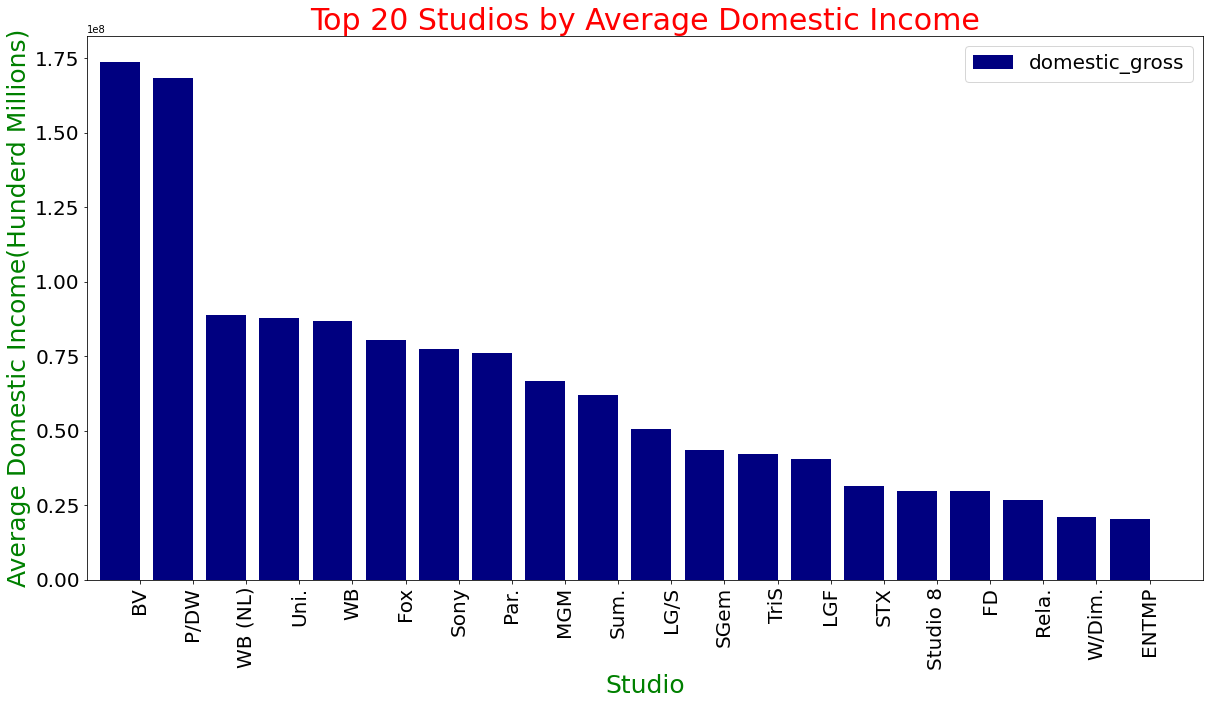

In [127]:
top_20_studios.plot.bar(figsize=(20, 10), width=1.5, color=colors)
plt.legend(['domestic_gross'], fontsize = 20, loc='upper right')
plt.title('Top 20 Studios by Average Domestic Income', fontsize='30', color='red')
plt.xlabel('Studio', fontsize='25', color='green')
plt.ylabel('Average Domestic Income(Hunderd Millions)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();

In [22]:
#JOINING DATAFRAMES

#df1.join(df2)
#df1.join(df2, lsuffix='1', rsuffix='2')
#df1.set_index('column').joindf2.set_index('column')

#MERGING DATAFRAME

#df1.merge(df2)
#df1.merge(df2, left_on='column_name_1', right_on='column_name_2', how=inner)==> for joining common items in both columns
#OR
#df1.merge(df2, left_on='column_name_1', right_on='column_name_2', how=outer)==> for joining all items in both columns

#CONCATING DATAFRAMES

#df_full = pd.concat([df1, df2], axis=1) ==> joins dataframes without overlapping the data



In [23]:
#bom_movie_gross.domestic_gross.plot(kind='hist', figsize=(15, 9))
#plt.xlabel("X-axis")
#plt.ylabel("y-axis")
#plt.legend(legend)
#plt.title('Customized histogram');

In [24]:
rt_movie = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter="\t")
rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


Create a new column called 'genre_list'

In [25]:
rt_movie['genre_lst'] = rt_movie['genre'].str.split('|')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_lst
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,"[Action and Adventure, Classics, Drama]"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]"
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,"[Drama, Musical and Performing Arts]"
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,"[Drama, Mystery and Suspense]"
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,"[Drama, Romance]"


Split the various genres in 'genre_list' to individual genres

In [26]:
rt_movie = rt_movie.explode('genre_lst')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_lst
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Science Fiction and Fantasy


Check for missing values in the dataframe

In [27]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3581 non-null   int64 
 1   synopsis      3479 non-null   object
 2   rating        3578 non-null   object
 3   genre         3573 non-null   object
 4   director      3138 non-null   object
 5   writer        2560 non-null   object
 6   theater_date  2872 non-null   object
 7   dvd_date      2872 non-null   object
 8   currency      724 non-null    object
 9   box_office    724 non-null    object
 10  runtime       3529 non-null   object
 11  studio        1062 non-null   object
 12  genre_lst     3573 non-null   object
dtypes: int64(1), object(12)
memory usage: 391.7+ KB


In [28]:
rt_movie.isna().sum()

id                 0
synopsis         102
rating             3
genre              8
director         443
writer          1021
theater_date     709
dvd_date         709
currency        2857
box_office      2857
runtime           52
studio          2519
genre_lst          8
dtype: int64

In [29]:
print('Number of unique values in synopsis:', len(rt_movie.synopsis.unique()))
print('Percentage of rows with missing values in synopsis:', 
      len(rt_movie[rt_movie.synopsis.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in rating:', len(rt_movie.rating.unique()))
print('Percentage of rows with missing values in rating:', 
      len(rt_movie[rt_movie.rating.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in director:', len(rt_movie.director.unique()))
print('Percentage of rows with missing values in director:', 
      len(rt_movie[rt_movie.director.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in writer:', len(rt_movie.writer.unique()))
print('Percentage of rows with missing values in writer:', 
      len(rt_movie[rt_movie.writer.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in theater_date:', len(rt_movie.theater_date.unique()))
print('Percentage of rows with missing values in theater_date:', 
      len(rt_movie[rt_movie.theater_date.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in dvd_date:', len(rt_movie.dvd_date.unique()))
print('Percentage of rows with missing values in dvd_date:', 
      len(rt_movie[rt_movie.dvd_date.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in currency:', len(rt_movie.currency.unique()))
print('Percentage of rows with missing values in currency:', 
      len(rt_movie[rt_movie.currency.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in box_office:', len(rt_movie.box_office.unique()))
print('Percentage of rows with missing values in box_office:', 
      len(rt_movie[rt_movie.box_office.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in runtime:', len(rt_movie.runtime.unique()))
print('Percentage of rows with missing values in runtime:', 
      len(rt_movie[rt_movie.runtime.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in studio:', len(rt_movie.studio.unique()))
print('Percentage of rows with missing values in studio:', 
      len(rt_movie[rt_movie.studio.isna()])/len(rt_movie) * 100,'%')

print('Number of unique values in genre_lst:', len(rt_movie.genre_lst.unique()))
print('Percentage of rows with missing values in genre_lst:', 
      len(rt_movie[rt_movie.genre_lst.isna()])/len(rt_movie) * 100,'%')


Number of unique values in synopsis: 1498
Percentage of rows with missing values in synopsis: 2.8483663781066744 %
Number of unique values in rating: 7
Percentage of rows with missing values in rating: 0.08377548170901983 %
Number of unique values in director: 1126
Percentage of rows with missing values in director: 12.37084613236526 %
Number of unique values in writer: 1070
Percentage of rows with missing values in writer: 28.51158894163641 %
Number of unique values in theater_date: 1026
Percentage of rows with missing values in theater_date: 19.798938843898352 %
Number of unique values in dvd_date: 718
Percentage of rows with missing values in dvd_date: 19.798938843898352 %
Number of unique values in currency: 2
Percentage of rows with missing values in currency: 79.78218374755654 %
Number of unique values in box_office: 337
Percentage of rows with missing values in box_office: 79.78218374755654 %
Number of unique values in runtime: 143
Percentage of rows with missing values in runti

Drop all columns with missing values > 30%; 'currency', 'box_office' and 'studio'

In [30]:
rt_movie = rt_movie.drop('studio', axis = 1)

In [31]:
rt_movie = rt_movie.drop('currency', axis = 1)

In [32]:
rt_movie = rt_movie.drop('box_office', axis = 1)

For columns with missing values >= 10% and <= 30%, raplace NaN with missing; 'director', 'writer', 'theater_date'and 'dvd_date'

In [33]:
rt_movie['director'] = rt_movie['director'].fillna('missing')

In [34]:
rt_movie['writer'] = rt_movie['writer'].fillna('missing')

In [35]:
rt_movie['theater_date'] = rt_movie['theater_date'].fillna('missing')

In [36]:
rt_movie['dvd_date'] = rt_movie['dvd_date'].fillna('missing')

For columns with missing values < 10%, delete the rows with missing values; 'rating', 'runtime' and 'genre_lst'

In [37]:
rt_movie = rt_movie.dropna()

In [38]:
rt_movie.isna().sum()

id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
runtime         0
genre_lst       0
dtype: int64

In [39]:
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_lst
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy


In [40]:
rt_movie['genre_list'] = rt_movie['genre_lst'].str.split('and')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_lst,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure,"[Action , Adventure]"
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics,[Classics]
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama,[Drama]
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama,[Drama]
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Science Fiction and Fantasy,"[Science Fiction , Fantasy]"


In [41]:
rt_movie = rt_movie.explode('genre_list')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,runtime,genre_lst,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure,Action
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action and Adventure,Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama,Drama


In [42]:
rt_movie = rt_movie.drop('genre', axis = 1)

In [43]:
rt_movie = rt_movie.drop('genre_lst', axis = 1)

In [44]:
rt_movie.head()

,id,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre_list
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Adventure
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
0,1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama


In [45]:
rtmovie = rt_movie.set_index('id', inplace=True)

In [46]:
rt_movie

,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre_list
id,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action
1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Adventure
1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
1,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
3,"New York City, not-too-distant-future: Eric Pa...",R,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes,Drama
...,...,...,...,...,...,...,...,...
2000,"Suspended from the force, Paris cop Hubert is ...",R,missing,Luc Besson,"Sep 27, 2001","Feb 11, 2003",94 minutes,International
2000,"Suspended from the force, Paris cop Hubert is ...",R,missing,Luc Besson,"Sep 27, 2001","Feb 11, 2003",94 minutes,Comedy
2000,"Suspended from the force, Paris cop Hubert is ...",R,missing,Luc Besson,"Sep 27, 2001","Feb 11, 2003",94 minutes,Drama


In [47]:
reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter = "\t", encoding = 'latin1')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [48]:
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [49]:
print('Number of unique values in review:', len(reviews.review.unique()))
print('Percentage of rows with missing values in review:', 
      len(reviews[reviews.review.isna()])/len(reviews) * 100,'%')

print('Number of unique values in rating:', len(reviews.rating.unique()))
print('Percentage of rows with missing values in rating:', 
      len(reviews[reviews.rating.isna()])/len(reviews) * 100,'%')

print('Number of unique values in critic:', len(reviews.critic.unique()))
print('Percentage of rows with missing values in critic:', 
      len(reviews[reviews.critic.isna()])/len(reviews) * 100,'%')

print('Number of unique values in publisher:', len(reviews.publisher.unique()))
print('Percentage of rows with missing values in publisher:', 
      len(reviews[reviews.publisher.isna()])/len(reviews) * 100,'%')

Number of unique values in review: 48683
Percentage of rows with missing values in review: 10.2200911228689 %
Number of unique values in rating: 187
Percentage of rows with missing values in rating: 24.832818930041153 %
Number of unique values in critic: 3497
Percentage of rows with missing values in critic: 5.000734861845973 %
Number of unique values in publisher: 1282
Percentage of rows with missing values in publisher: 0.5676807760141093 %


For columns with missing values >= 10% and <= 30%, raplace NaN with missing; 'review', 'writer' and 'rating'

In [50]:
reviews['review'] = reviews['review'].fillna('missing')

In [51]:
reviews['rating'] = reviews['rating'].fillna('0/0')

For columns with missing values < 10%, delete the rows with missing values; 'critic' and 'publisher'

In [52]:
reviews = reviews.dropna()

In [53]:
reviews.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [54]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,0/0,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,0/0,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,0/0,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
5,3,... Cronenberg's Cosmopolis expresses somethin...,0/0,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"


In [55]:
reviews = reviews.reset_index(drop=True)

In [56]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,0/0,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,0/0,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,0/0,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... Cronenberg's Cosmopolis expresses somethin...,0/0,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"


In [57]:
tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=[0])
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Check for missing values

In [58]:
tmdb_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [59]:
tmdb_movies.set_index('id', inplace=True, drop=True)

In [60]:
tmdb_movies.head()

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,,,
12444,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
10138,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
862,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
27205,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [61]:
tmdb_movies = tmdb_movies.sort_values(by='id', ascending=True)


In [62]:
tmdb_movies

,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,,,
27,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
62,"[878, 9648, 12]",en,2001: A Space Odyssey,23.781,1968-04-10,2001: A Space Odyssey,8.0,5837
90,"[28, 35, 80]",en,Beverly Hills Cop,15.067,1984-11-30,Beverly Hills Cop,7.1,1827
93,"[80, 18, 9648, 53]",en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359
95,"[28, 53, 878, 12]",en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267
...,...,...,...,...,...,...,...,...
607044,[35],en,The Penguins of Madagascar: Operation N-W.O.R.D.,0.840,2018-10-16,The Penguins of Madagascar: Operation N-W.O.R.D.,8.0,1
607721,[],en,Adventures of a Pizza Guy,1.483,2015-05-30,Adventures of a Pizza Guy,6.0,1
607777,"[53, 9648, 80]",en,Door to Door,0.706,2018-12-10,Door to Door,10.0,1


In [63]:
views = tmdb_movies.merge(reviews, how='inner', left_on='id', right_on='id')

In [64]:
views

,id,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count,review,rating,fresh,critic,top_critic,publisher,date
0,93,"[80, 18, 9648, 53]",en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,"This is not merely a Garbo film, it is a Lubit...",0/0,fresh,Graham Greene,0,The Spectator,"May 8, 2018"
1,93,"[80, 18, 9648, 53]",en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,"The romantic roundelay, linking fine emotions ...",0/0,fresh,Richard Brody,1,New Yorker,"May 9, 2016"
2,93,"[80, 18, 9648, 53]",en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,This column has generally no quarrel with scen...,0/0,rotten,Franz Hoellering,0,The Nation,"January 18, 2013"
3,93,"[80, 18, 9648, 53]",en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,This one is neither crude clowning nor crude p...,0/0,fresh,Whittaker Chambers,1,TIME Magazine,"January 15, 2013"
4,93,"[80, 18, 9648, 53]",en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359,Ninotchka is delicate flirtation and political...,5/5,fresh,Joshua Rothkopf,1,Time Out,"December 27, 2012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,1930,"[28, 12, 14]",en,The Amazing Spider-Man,24.391,2012-07-04,The Amazing Spider-Man,6.5,10411,Second and least successful entry in the Harry...,3/5,fresh,Ken Hanke,0,"Mountain Xpress (Asheville, NC)","December 4, 2003"
1002,1930,"[28, 12, 14]",en,The Amazing Spider-Man,24.391,2012-07-04,The Amazing Spider-Man,6.5,10411,missing,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"November 5, 2004"
1003,1930,"[28, 12, 14]",en,The Amazing Spider-Man,24.391,2012-07-04,The Amazing Spider-Man,6.5,10411,missing,3/5,fresh,Carol Cling,0,Las Vegas Review-Journal,"January 5, 2004"
1004,1930,"[28, 12, 14]",en,The Amazing Spider-Man,24.391,2012-07-04,The Amazing Spider-Man,6.5,10411,missing,7,fresh,Brian Webster,0,Apollo Guide,"September 26, 2001"


In [65]:
data = views.merge(rt_movie, how='inner', left_on='id', right_on='id')

In [66]:
data = data.groupby('director').mean()

In [67]:
data.head()

,id,popularity,vote_average,vote_count,top_critic
director,,,,,
Ang Lee,830.0,10.274,7.3,388.0,0.307692
Anthony Russo|Joe Russo,862.0,28.005,7.9,10174.0,0.272059
Arthur Hiller,839.0,8.661,7.4,742.0,0.300000
Ben Younger,95.0,15.799,6.7,4267.0,0.216667
Charles Burnett,797.0,13.342,8.3,726.0,0.380952


In [68]:
data = data.drop('id', axis = 1)

In [69]:
data = data.drop('top_critic', axis = 1)

In [70]:
data.head()

,popularity,vote_average,vote_count
director,,,
Ang Lee,10.274,7.3,388.0
Anthony Russo|Joe Russo,28.005,7.9,10174.0
Arthur Hiller,8.661,7.4,742.0
Ben Younger,15.799,6.7,4267.0
Charles Burnett,13.342,8.3,726.0


In [71]:
len(data)

19

In [72]:
data_plus = data.sort_values(by='popularity', ascending=False)
data_plus

,popularity,vote_average,vote_count
director,,,
Craig Brewer,30.579,6.4,8571.0
Anthony Russo|Joe Russo,28.005,7.9,10174.0
Fritz Lang,25.808,6.9,12810.0
Guy Hamilton,24.391,6.5,10411.0
Kinji Fukasaku,19.903,7.3,2622.0
Tony Bill,18.013,8.1,5764.0
Paolo Taviani|Vittorio Taviani,17.717,8.4,2243.0
Tom Gries,16.554,8.1,981.0
Richard Donner,16.064,7.0,3015.0


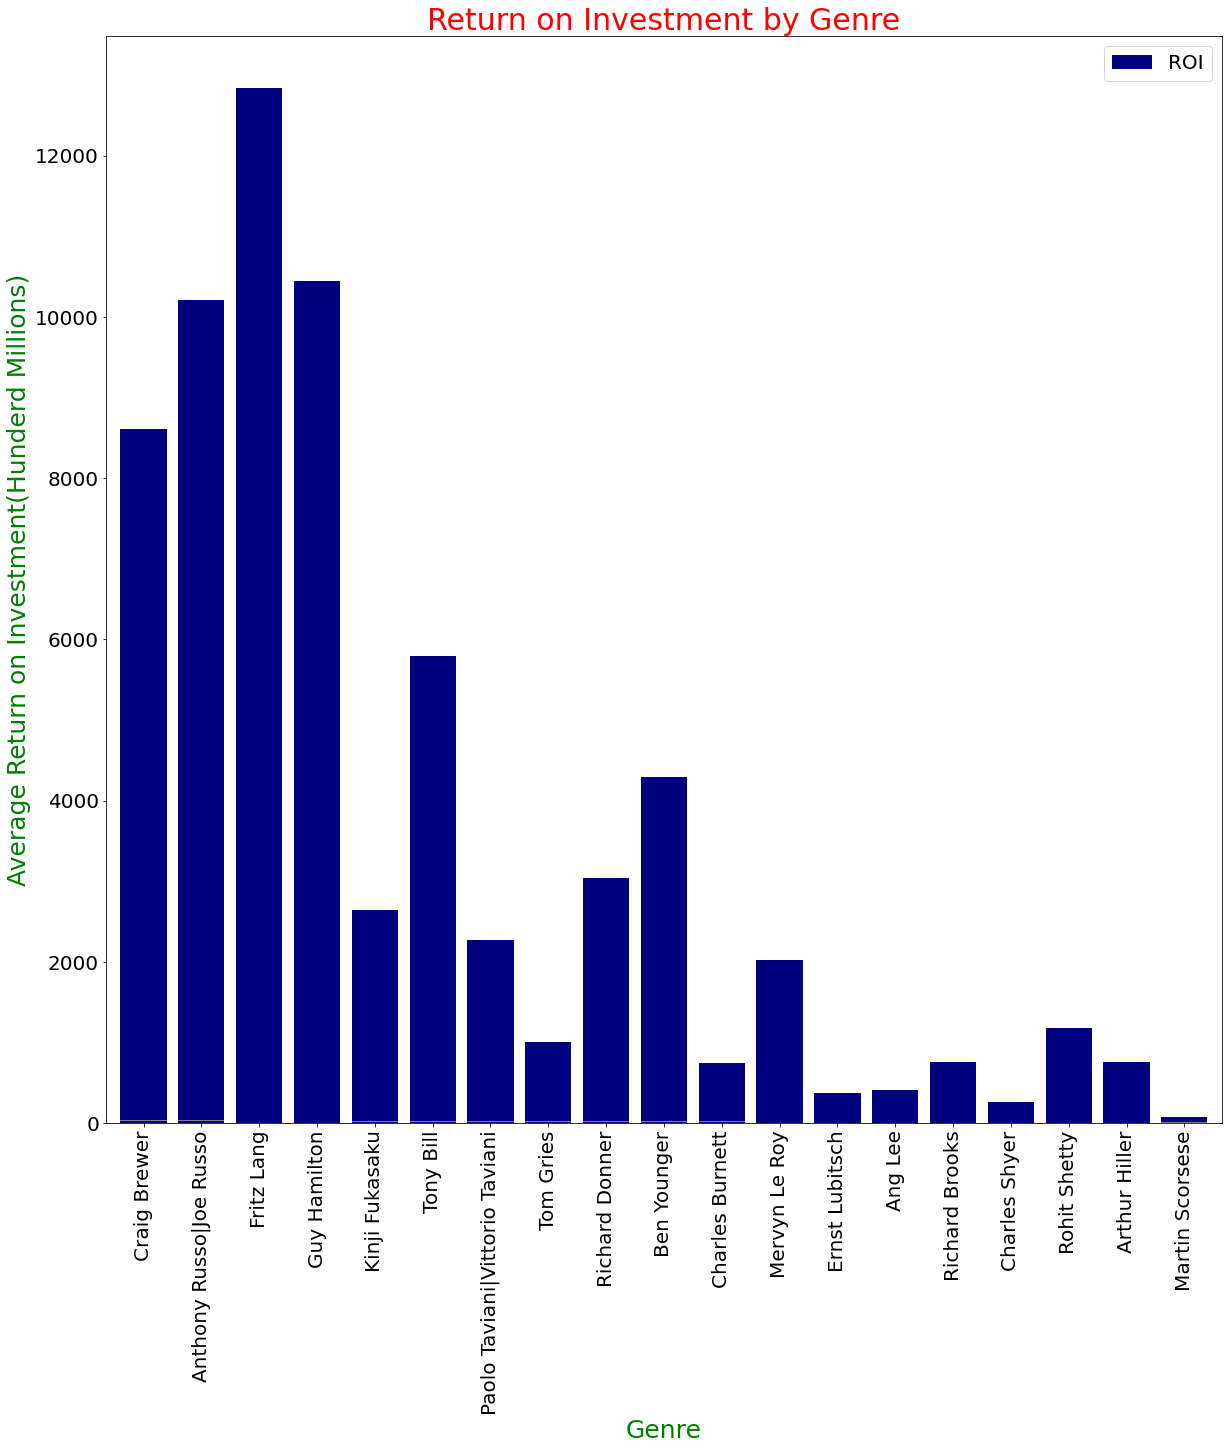

In [73]:
data_plus.plot.bar(figsize=(20, 20), width=.8, stacked=True, color=('navy','grey'))
plt.legend(['ROI'], fontsize = 20, loc='upper right')
plt.title('Return on Investment by Genre', fontsize='30', color='red')
plt.xlabel('Genre', fontsize='25', color='green')
plt.ylabel('Average Return on Investment(Hunderd Millions)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();

Check for missing values

In [74]:
movie_budgets = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Check for missing values

In [75]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Convert the values of 'production_budget', 'domestic_gross' and 'worldwide_gross' from object to float

In [76]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].apply(lambda x: x.strip('$')
                                                                              .replace(',','')).astype(float)

In [77]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].apply(lambda x: x.strip('$').replace(',','')).astype(float)

In [78]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].apply(lambda x: x.strip('$').replace(',','')).astype(float)

In [79]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


Create two new columns, one to represent the 'total gross' and the other to represent the Return on Investment (ROI)

In [80]:
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']

In [81]:
movie_budgets['ROI'] = movie_budgets['total_gross'] + movie_budgets['production_budget']

In [82]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.961853e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,1.697328e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,5.425247e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,2.192620e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,2.253903e+09


In [83]:
movie_budgets.set_index('id', inplace=True, drop=True)

In [84]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.961853e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.286728e+09,1.697328e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.925247e+08,5.425247e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.862020e+09,2.192620e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.936903e+09,2.253903e+09


In [85]:
news = movie_budgets.merge(rt_movie, how='inner', left_on='id', right_on='id')
news

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross,ROI,synopsis,rating,director,writer,theater_date,dvd_date,runtime,genre_list
id,,,,,,,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.961853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.961853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Adventure
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.961853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Classics
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,3.536853e+09,3.961853e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Drama
1,"May 29, 2009",Up,175000000.0,293004164.0,7.314634e+08,1.024468e+09,1.199468e+09,"This gritty, fast-paced, and innovative police...",R,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,"Jul 11, 2014",As It Is in Heaven,450000.0,13486.0,1.348600e+04,2.697200e+04,4.769720e+05,Four old college friends in their forties come...,NR,Willem van de Sande Bakhuyzen,missing,missing,missing,108 minutes,Drama
100,"Dec 31, 2014",Horse Camp,250000.0,0.0,0.000000e+00,0.000000e+00,2.500000e+05,Four old college friends in their forties come...,NR,Willem van de Sande Bakhuyzen,missing,missing,missing,108 minutes,Comedy
100,"Dec 31, 2014",Horse Camp,250000.0,0.0,0.000000e+00,0.000000e+00,2.500000e+05,Four old college friends in their forties come...,NR,Willem van de Sande Bakhuyzen,missing,missing,missing,108 minutes,Drama


In [86]:
new = news.groupby('genre_list').mean()
new

,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
genre_list,,,,,
Adventure,3.154294e+07,4.191989e+07,9.077010e+07,1.326900e+08,1.642329e+08
Family,3.164530e+07,4.318121e+07,9.417847e+07,1.373597e+08,1.690050e+08
Fantasy,3.239140e+07,4.245004e+07,9.488473e+07,1.373348e+08,1.697262e+08
Fitness,3.010175e+07,3.571045e+07,7.324444e+07,1.089549e+08,1.390566e+08
International,3.076802e+07,4.408969e+07,9.196056e+07,1.360503e+08,1.668183e+08
Performing Arts,3.160773e+07,4.694775e+07,1.019574e+08,1.489051e+08,1.805129e+08
Suspense,3.130926e+07,4.327754e+07,9.222385e+07,1.355014e+08,1.668106e+08
Action,3.154294e+07,4.191989e+07,9.077010e+07,1.326900e+08,1.642329e+08
Art House,3.076802e+07,4.408969e+07,9.196056e+07,1.360503e+08,1.668183e+08


In [87]:
prod_bud = new.sort_values(by='ROI', ascending=False)
prod_bud

,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
genre_list,,,,,
Classics,3.173234e+07,4.614555e+07,1.027072e+08,1.488527e+08,1.805851e+08
Performing Arts,3.160773e+07,4.694775e+07,1.019574e+08,1.489051e+08,1.805129e+08
Musical,3.160773e+07,4.694775e+07,1.019574e+08,1.489051e+08,1.805129e+08
Horror,3.084441e+07,4.712231e+07,1.011095e+08,1.482318e+08,1.790762e+08
Fantasy,3.239140e+07,4.245004e+07,9.488473e+07,1.373348e+08,1.697262e+08
Science Fiction,3.239140e+07,4.245004e+07,9.488473e+07,1.373348e+08,1.697262e+08
Family,3.164530e+07,4.318121e+07,9.417847e+07,1.373597e+08,1.690050e+08
Kids,3.164530e+07,4.318121e+07,9.417847e+07,1.373597e+08,1.690050e+08
Art House,3.076802e+07,4.408969e+07,9.196056e+07,1.360503e+08,1.668183e+08


In [88]:
prod_bud = prod_bud.drop('domestic_gross', axis = 1)

In [89]:
prod_bud = prod_bud.drop('worldwide_gross', axis = 1)

In [90]:
prod_bud = prod_bud.drop('total_gross', axis = 1)

In [91]:
prod_bud

,production_budget,ROI
genre_list,,
Classics,3.173234e+07,1.805851e+08
Performing Arts,3.160773e+07,1.805129e+08
Musical,3.160773e+07,1.805129e+08
Horror,3.084441e+07,1.790762e+08
Fantasy,3.239140e+07,1.697262e+08
Science Fiction,3.239140e+07,1.697262e+08
Family,3.164530e+07,1.690050e+08
Kids,3.164530e+07,1.690050e+08
Art House,3.076802e+07,1.668183e+08


In [92]:
returns = prod_bud.drop('production_budget', axis = 1)
returns

,ROI
genre_list,
Classics,1.805851e+08
Performing Arts,1.805129e+08
Musical,1.805129e+08
Horror,1.790762e+08
Fantasy,1.697262e+08
Science Fiction,1.697262e+08
Family,1.690050e+08
Kids,1.690050e+08
Art House,1.668183e+08


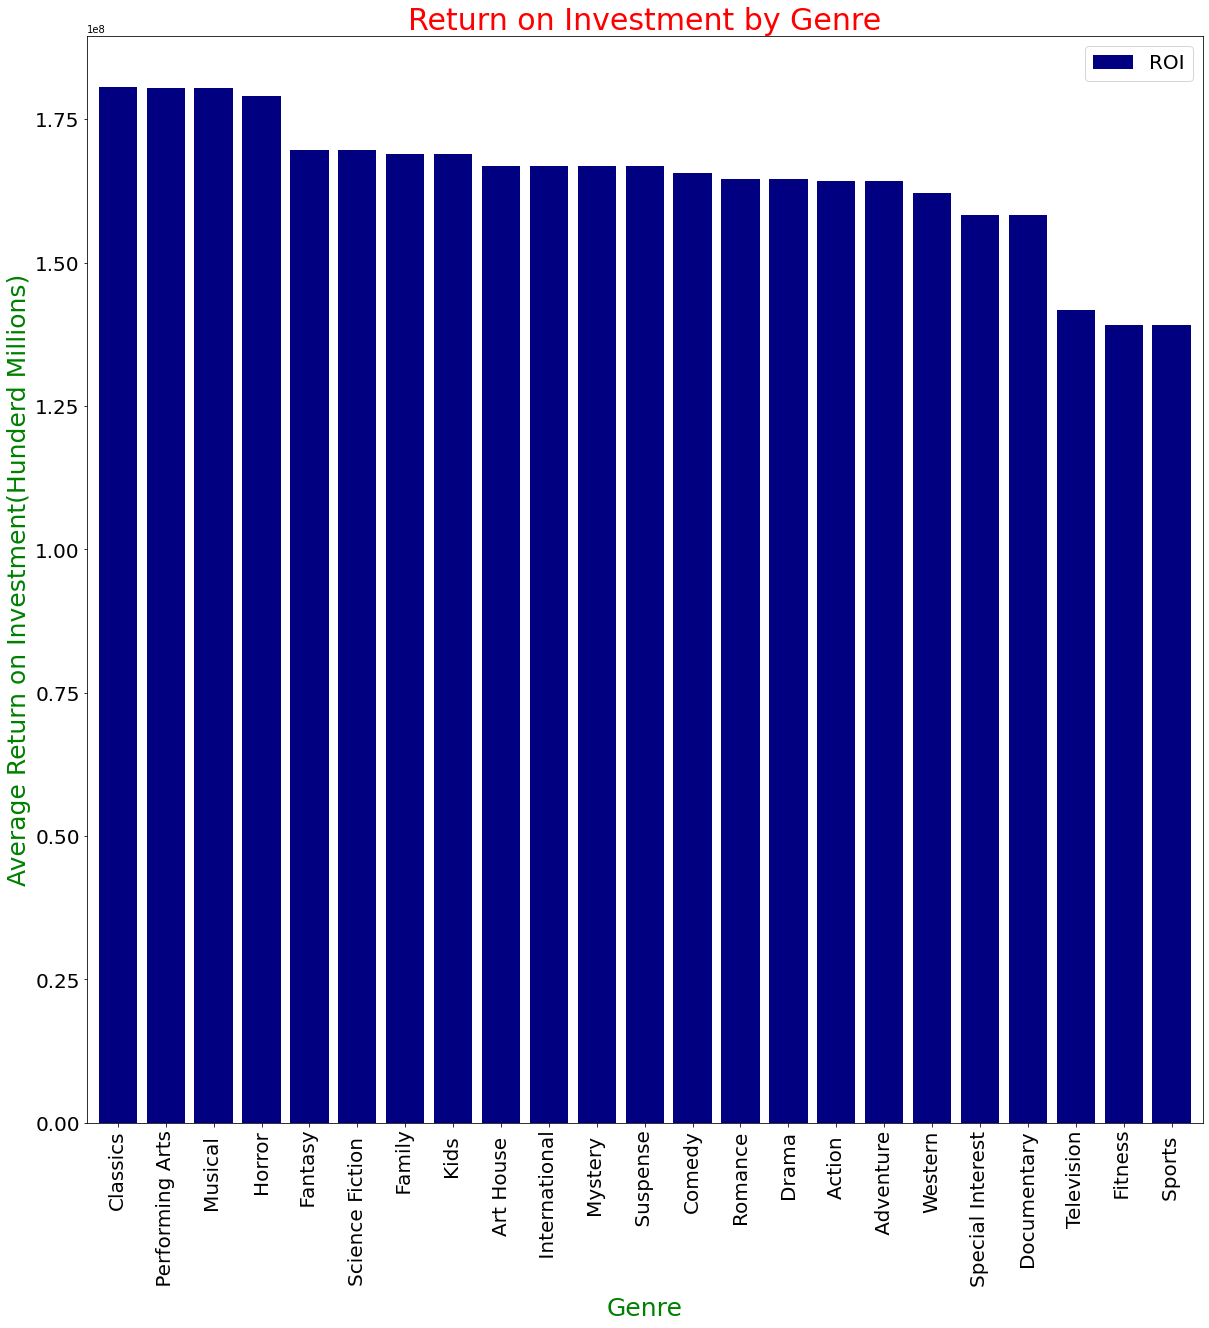

In [93]:
returns.plot.bar(figsize=(20, 20), width=.8, color='navy')
plt.legend(['ROI'], fontsize = 20, loc='upper right')
plt.title('Return on Investment by Genre', fontsize='30', color='red')
plt.xlabel('Genre', fontsize='25', color='green')
plt.ylabel('Average Return on Investment(Hunderd Millions)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();

In [94]:
pd = prod_bud.sort_values(by='production_budget', ascending=False)

In [95]:
budget = pd.drop('ROI', axis = 1)
budget

,production_budget
genre_list,
Documentary,3.310526e+07
Special Interest,3.310526e+07
Fantasy,3.239140e+07
Science Fiction,3.239140e+07
Classics,3.173234e+07
Family,3.164530e+07
Kids,3.164530e+07
Musical,3.160773e+07
Performing Arts,3.160773e+07


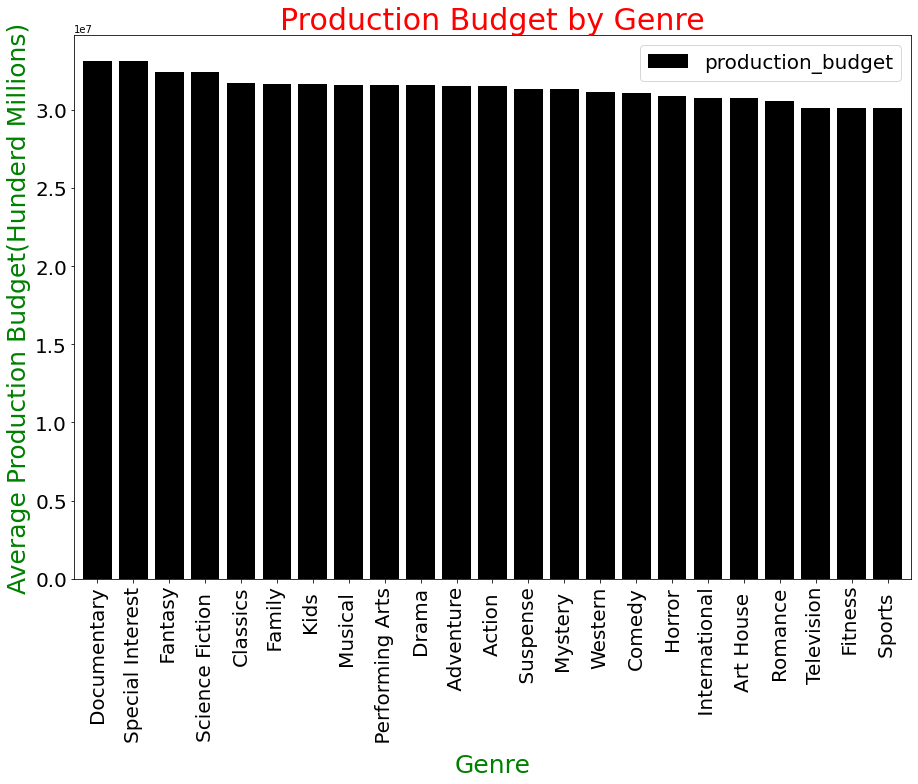

In [96]:
budget.plot.bar(figsize=(15, 10), width=.8, color='black')
plt.legend(['production_budget'], fontsize = 20, loc='upper right')
plt.title('Production Budget by Genre', fontsize='30', color='red')
plt.xlabel('Genre', fontsize='25', color='green')
plt.ylabel('Average Production Budget(Hunderd Millions)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();

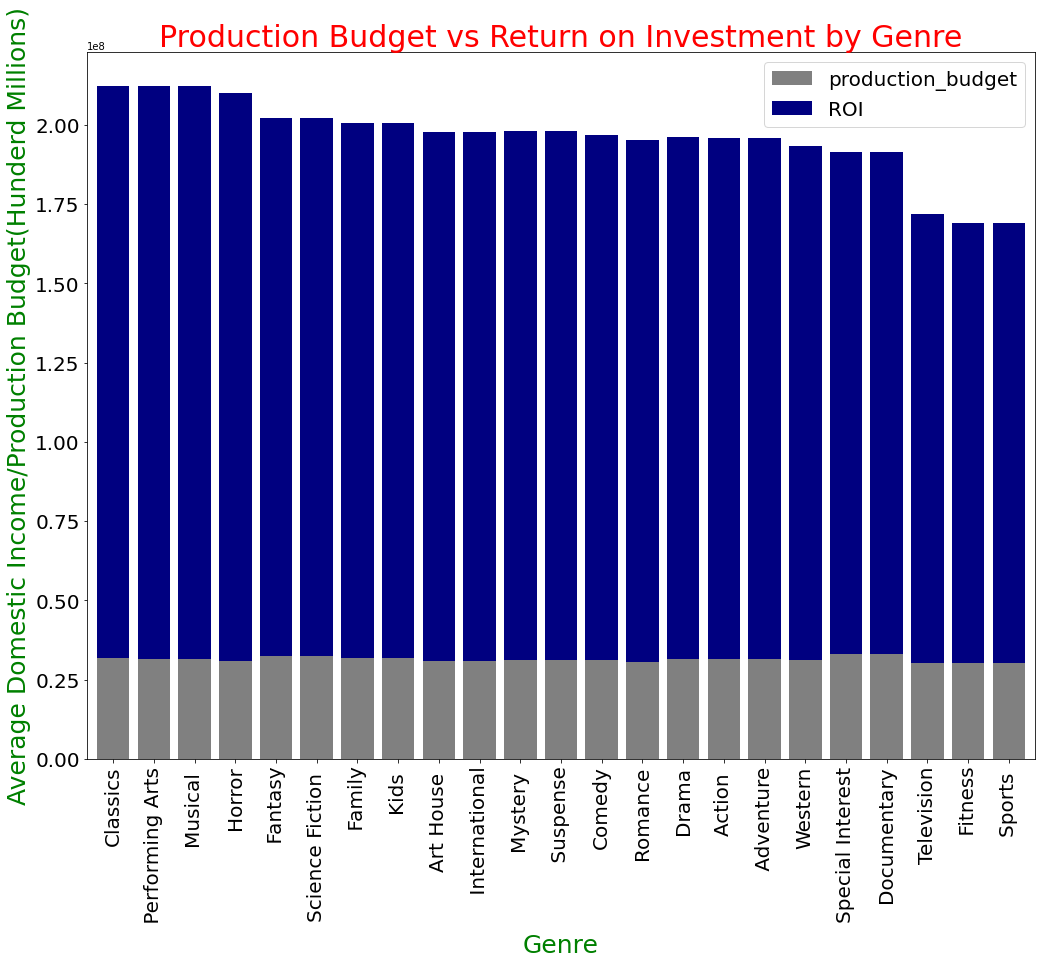

In [97]:
prod_bud.plot.bar(figsize=(17, 13), width=.8, stacked=True, color=('grey', 'navy'))
plt.legend(['production_budget', 'ROI'], fontsize = 20, loc='upper right')
plt.title('Production Budget vs Return on Investment by Genre', fontsize='30', color='red')
plt.xlabel('Genre', fontsize='25', color='green')
plt.ylabel('Average Domestic Income/Production Budget(Hunderd Millions)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();

In [98]:
direct = news.groupby('director').mean()
direct

,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
director,,,,,
Alan Alda,3.027216e+07,4.214399e+07,8.887686e+07,1.310208e+08,1.612930e+08
Alan Hale,2.995821e+07,3.844114e+07,8.587932e+07,1.243205e+08,1.542787e+08
Allen Hughes|Albert Hughes,3.083160e+07,4.798312e+07,1.139748e+08,1.619579e+08,1.927895e+08
Allison Anders,3.472362e+07,4.948760e+07,1.054566e+08,1.549442e+08,1.896678e+08
Anatole Litvak,3.034490e+07,5.054890e+07,1.164315e+08,1.669804e+08,1.973253e+08
...,...,...,...,...,...
William Friedkin,3.517615e+07,4.055063e+07,1.003239e+08,1.408745e+08,1.760507e+08
William Wellman,3.134081e+07,5.311426e+07,1.340050e+08,1.871192e+08,2.184600e+08
Woody Allen,3.077845e+07,4.128756e+07,8.430087e+07,1.255884e+08,1.563669e+08


In [99]:
director = direct.sort_values(by='ROI', ascending=False)
director

,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
director,,,,,
Jim Jarmusch,3.251336e+07,5.695159e+07,1.316875e+08,1.886391e+08,2.211525e+08
William Wellman,3.134081e+07,5.311426e+07,1.340050e+08,1.871192e+08,2.184600e+08
Carl Erik Rinsch,3.255309e+07,5.186605e+07,1.240177e+08,1.758838e+08,2.084369e+08
Barry Levinson,3.449806e+07,5.244219e+07,1.125342e+08,1.649764e+08,1.994744e+08
Roy Ward Baker,3.158974e+07,5.346198e+07,1.123490e+08,1.658109e+08,1.974007e+08
...,...,...,...,...,...
Willem van de Sande Bakhuyzen,2.995551e+07,3.443314e+07,7.526078e+07,1.096939e+08,1.396494e+08
Ben Younger,3.010175e+07,3.571045e+07,7.324444e+07,1.089549e+08,1.390566e+08
Peter Baldwin,3.305362e+07,3.051208e+07,7.173053e+07,1.022426e+08,1.352962e+08


In [100]:
top_20_directors = director[:20]
top_20_directors

,production_budget,domestic_gross,worldwide_gross,total_gross,ROI
director,,,,,
Jim Jarmusch,3.251336e+07,5.695159e+07,1.316875e+08,1.886391e+08,2.211525e+08
William Wellman,3.134081e+07,5.311426e+07,1.340050e+08,1.871192e+08,2.184600e+08
Carl Erik Rinsch,3.255309e+07,5.186605e+07,1.240177e+08,1.758838e+08,2.084369e+08
Barry Levinson,3.449806e+07,5.244219e+07,1.125342e+08,1.649764e+08,1.994744e+08
Roy Ward Baker,3.158974e+07,5.346198e+07,1.123490e+08,1.658109e+08,1.974007e+08
Anatole Litvak,3.034490e+07,5.054890e+07,1.164315e+08,1.669804e+08,1.973253e+08
Allen Hughes|Albert Hughes,3.083160e+07,4.798312e+07,1.139748e+08,1.619579e+08,1.927895e+08
Bill Froehlich,3.071319e+07,5.012949e+07,1.112841e+08,1.614136e+08,1.921267e+08
Allison Anders,3.472362e+07,4.948760e+07,1.054566e+08,1.549442e+08,1.896678e+08


In [101]:
top_20_directors = top_20_directors.drop('domestic_gross', axis = 1)

In [102]:
top_20_directors = top_20_directors.drop('worldwide_gross', axis = 1)

In [103]:
top_20_directors = top_20_directors.drop('total_gross', axis = 1)

In [104]:
top_20_directors = top_20_directors.drop('production_budget', axis = 1)

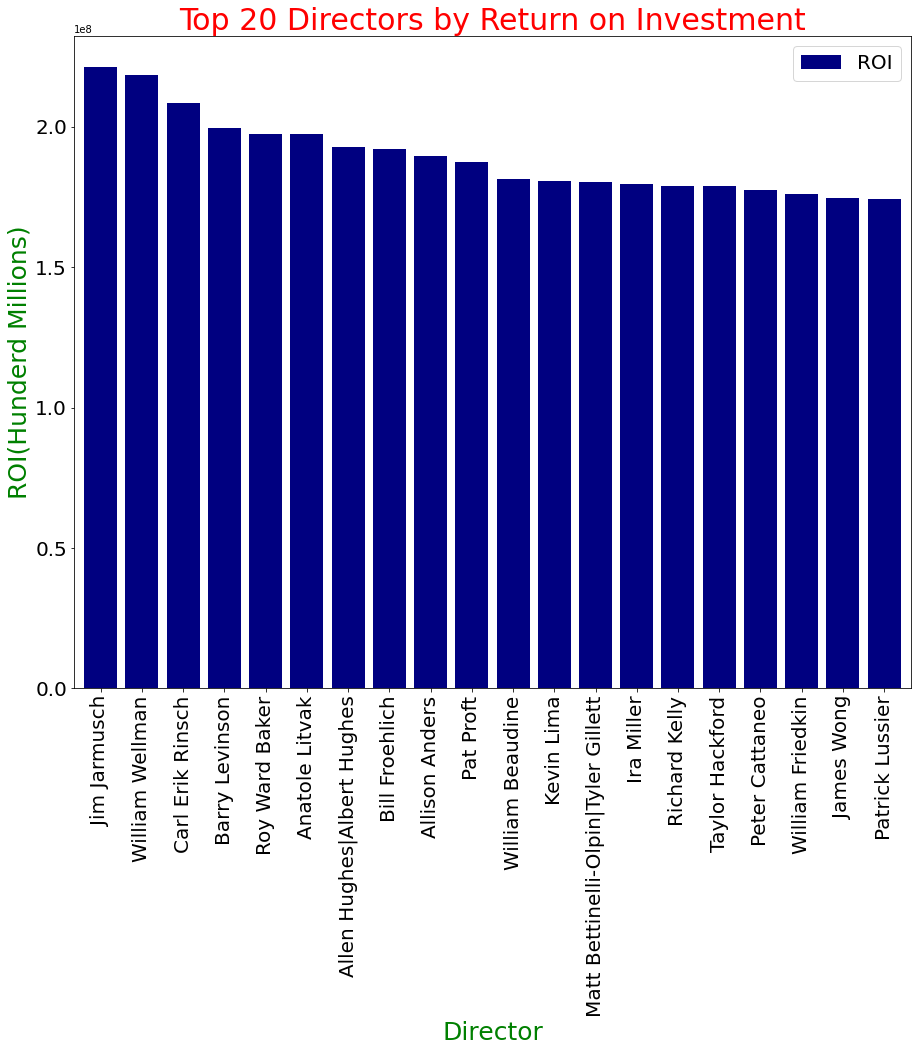

In [105]:
top_20_directors.plot.bar(figsize=(15, 12), width=.8, stacked=True, color=('navy'))
plt.legend(['ROI'], fontsize = 20, loc='upper right')
plt.title('Top 20 Directors by Return on Investment', fontsize='30', color='red')
plt.xlabel('Director', fontsize='25', color='green')
plt.ylabel('ROI(Hunderd Millions)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();

In [106]:
stud = bom_movie_gross.merge(movie_budgets, how='inner', left_on='domestic_gross', right_on='domestic_gross')

In [107]:
stud =stud.groupby('studio').mean()

In [108]:
stud

,domestic_gross,year,production_budget,worldwide_gross,total_gross,ROI
studio,,,,,,
3D,6.100000e+06,2010.000000,1.200000e+06,6.100000e+06,1.220000e+07,1.340000e+07
A24,3.478947e+06,2015.526316,1.485721e+07,4.342105e+06,7.821053e+06,2.267826e+07
AF,1.000000e+06,2012.000000,1.050000e+07,1.000000e+06,2.000000e+06,1.250000e+07
ATO,1.000000e+06,2010.000000,1.050000e+07,1.000000e+06,2.000000e+06,1.250000e+07
Amazon,3.700000e+06,2018.000000,1.175000e+06,3.700000e+06,7.400000e+06,8.575000e+06
...,...,...,...,...,...,...
WB (NL),4.638000e+07,2014.600000,6.862849e+06,8.594000e+07,1.323200e+08,1.391828e+08
WGUSA,1.360000e+06,2017.200000,1.660000e+07,1.360000e+06,2.720000e+06,1.932000e+07
Wein.,1.073947e+07,2013.210526,9.280421e+06,1.432098e+07,2.506046e+07,3.434088e+07


In [109]:
studios = stud.sort_values(by='ROI', ascending=False)
studios

,domestic_gross,year,production_budget,worldwide_gross,total_gross,ROI
studio,,,,,,
P/DW,73000000.0,2010.00,15000000.0,73259017.0,146259017.0,161259017.0
BV,34000000.0,2016.00,21000000.0,86262014.0,120262014.0,141262014.0
WB (NL),46380000.0,2014.60,6862849.4,85940000.0,132320000.0,139182849.4
Over.,39100000.0,2010.00,10000000.0,50100000.0,89200000.0,99200000.0
SGem,34750000.0,2011.75,17800000.0,38250000.0,73000000.0,90800000.0
...,...,...,...,...,...,...
Kino,18000.0,2010.00,3000000.0,156362.0,174362.0,3174362.0
Outs,18000.0,2012.00,3000000.0,156362.0,174362.0,3174362.0
Arrow,21000.0,2017.00,2000000.0,21000.0,42000.0,2042000.0


In [110]:
top_twenty_studios = studios[:20]
top_twenty_studios 

,domestic_gross,year,production_budget,worldwide_gross,total_gross,ROI
studio,,,,,,
P/DW,7.300000e+07,2010.000000,1.500000e+07,7.325902e+07,1.462590e+08,1.612590e+08
BV,3.400000e+07,2016.000000,2.100000e+07,8.626201e+07,1.202620e+08,1.412620e+08
WB (NL),4.638000e+07,2014.600000,6.862849e+06,8.594000e+07,1.323200e+08,1.391828e+08
Over.,3.910000e+07,2010.000000,1.000000e+07,5.010000e+07,8.920000e+07,9.920000e+07
SGem,3.475000e+07,2011.750000,1.780000e+07,3.825000e+07,7.300000e+07,9.080000e+07
Uni.,2.664348e+07,2014.130435,1.212989e+07,4.643721e+07,7.308068e+07,8.521058e+07
Par.,1.958000e+07,2014.800000,1.637100e+07,3.839995e+07,5.797995e+07,7.435095e+07
Fox,1.832353e+07,2013.235294,7.659235e+06,3.411532e+07,5.243885e+07,6.009808e+07
Neon,1.920000e+07,2017.000000,9.070000e+06,2.808570e+07,4.728570e+07,5.635570e+07


In [111]:
top_twenty_studios = top_twenty_studios.drop('domestic_gross', axis = 1)

In [112]:
top_twenty_studios = top_twenty_studios.drop('year', axis = 1)

In [113]:
top_twenty_studios = top_twenty_studios.drop('worldwide_gross', axis = 1)

In [114]:
top_twenty_studios = top_twenty_studios.drop('total_gross', axis = 1)

In [115]:
top_twenty_studios = top_twenty_studios.drop('production_budget', axis = 1)

In [116]:
top_twenty_studios

,ROI
studio,
P/DW,1.612590e+08
BV,1.412620e+08
WB (NL),1.391828e+08
Over.,9.920000e+07
SGem,9.080000e+07
Uni.,8.521058e+07
Par.,7.435095e+07
Fox,6.009808e+07
Neon,5.635570e+07


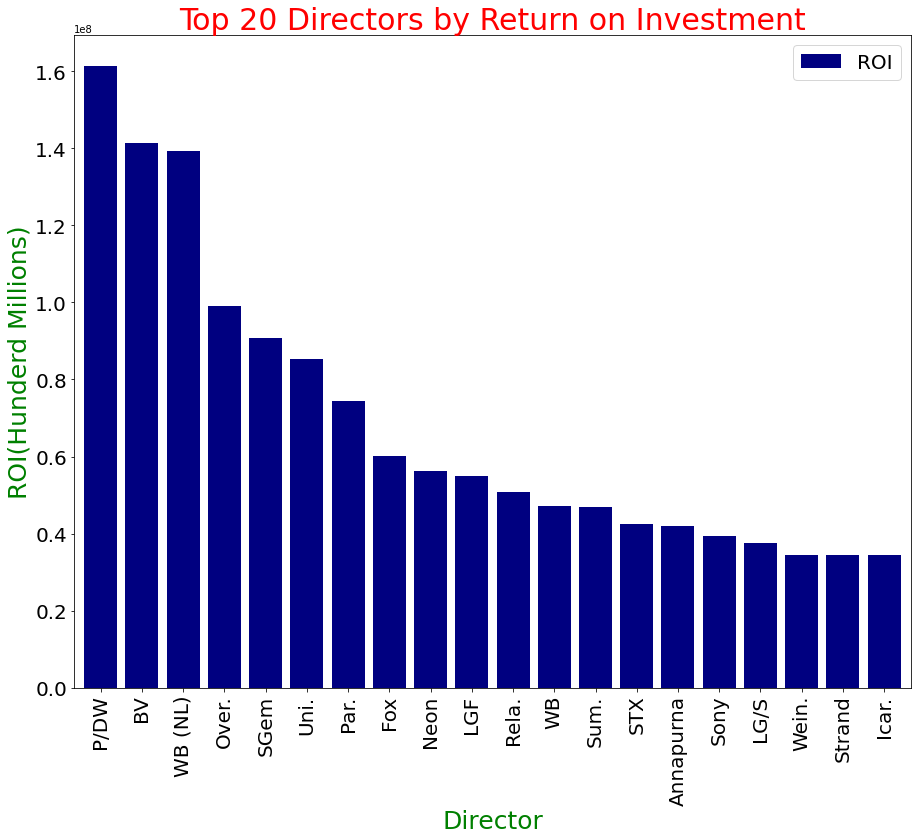

In [117]:
top_twenty_studios.plot.bar(figsize=(15, 12), width=.8, stacked=True, color=('navy'))
plt.legend(['ROI'], fontsize = 20, loc='upper right')
plt.title('Top 20 Directors by Return on Investment', fontsize='30', color='red')
plt.xlabel('Director', fontsize='25', color='green')
plt.ylabel('ROI(Hunderd Millions)', fontsize='25', color='green')
plt.xticks(fontsize='20')
plt.yticks(fontsize='20')
plt.show();

## SQL Data

The below line should only need to be run once. It unzips the SQL data, since SQLite doesn't work with zipped data.

In [118]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


Then here is some starter code that reads one of the data tables from the database:

In [119]:
#import sqlite3

In [120]:
#conn = sqlite3.connect("im.db")

In [121]:
#movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
#movie_basics

## Your Data Analysis Here


1. first join the dataframes, to get a scatter plot of budget against profit, grouping by:

    i) genre

    ii) director

    iii) writer

    iv) studio

2. do a barchart of profit against average votes

from the SQL data,
    top 10 - writers, directors, actors

scatterplot of budget against total gross, grouped by genres

barchat of genres against profit.

barchart of either top directors/writers/actors against movie ratings

also, movie ratings against profit

check for average gross groupby genres

highest average ratings groupby directors or writers

At the end, it is always a best practice to close the connection to the database.

In [122]:
#conn.close('')